In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Why calculate differences before the mean?

Calculating the mean, skipping NaN's
[6.75 17.5 31.25 48.0 44.0 67.0 83.0]

Differences between consecutive values:
[10.75 13.75 16.75 -4.0 23.0 16.0] (Notice the negative value -4.0 in this list)


Differences between consecutive values:
[[  6.  16.   8.  11.  29.   7.]
 [  7.  12.   8.   8.  21.  24.]
 [ 18.  12.  44.  nan  nan  nan]
 [ 12.  15.   7.   7.  19.  17.]]

Only now taking the mean of available differences:
[10.75 13.75 16.75 8.666666666666666 23.0 16.0] (No negative values this time)


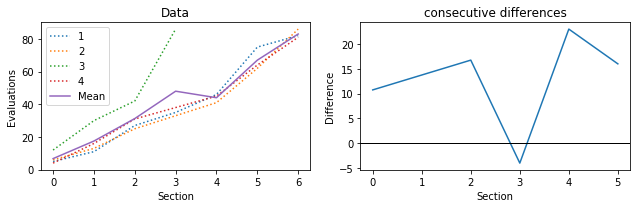

In [21]:
x = np.array([
    [ 5, 11, 27, 35,     46,     75,     82],
    [ 6, 13, 25, 33,     41,     62,     86],
    [12, 30, 42, 86, np.NaN, np.NaN, np.NaN],
    [ 4, 16, 31, 38,     45,     64,     81],
])

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(9,3))

mean_first = np.ma.masked_invalid(x).mean(axis=0)
mean_first_diffs = mean_first[1:] - mean_first[:-1]

print("Calculating the mean, skipping NaN's")
print(mean_first)
print()
print("Differences between consecutive values:")
print(mean_first_diffs, '(Notice the negative value -4.0 in this list)')
print()
print()

diff_first = x[:,1:] - x[:,:-1]
diff_first_means = np.ma.masked_invalid(diff_first).mean(axis=0)
print("Differences between consecutive values:")
print(diff_first)
print()
print("Only now taking the mean of available differences:")
print(diff_first_means, '(No negative values this time)')

axes[0].set_title("Data")
for dat, label in zip(x, [1,2,3,4]):
    axes[0].plot(dat, linestyle='dotted', label=label)
axes[0].plot(mean_first, label='Mean')
axes[0].set_xlabel('Section')
axes[0].set_ylabel('Evaluations')
axes[0].legend(loc=0)



axes[1].set_title("consecutive differences")
axes[1].plot(mean_first_diffs)
# axes[2].plot(diff_first_means)
axes[1].axhline(0, linewidth=1, color='black')
axes[1].set_xlabel('Section')
axes[1].set_ylabel('Difference')

plt.tight_layout()
plt.savefig('diff_before_mean.pdf')
plt.show()


# Adaptive example

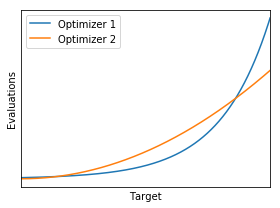

In [29]:
x = np.linspace(0, 10, 10001)
y = x**2
z = np.exp(x/2)

def doplot():
    plt.figure(figsize=(4, 3))
    plt.plot(x, z, label='Optimizer 1')
    plt.plot(x, y, label='Optimizer 2')
    plt.xlim([0,10])
    plt.legend(loc=0)
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False
    )
    plt.xlabel('Target')
    plt.ylabel('Evaluations')


doplot()
plt.tight_layout()
plt.savefig('adaptive_example_1.pdf')
plt.show()

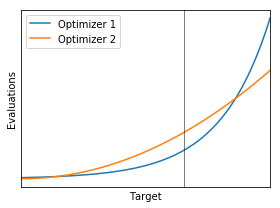

In [30]:
ydiff = y[1:] - y[:-1]
zdiff = z[1:] - z[:-1]
comp = ydiff < zdiff
where = np.min(np.argwhere(comp[1000:])) + 1000
doplot()
plt.axvline(x=x[where], color='black', linewidth=1, alpha=.5)
plt.tight_layout()
plt.savefig('adaptive_example_2.pdf')
plt.show()

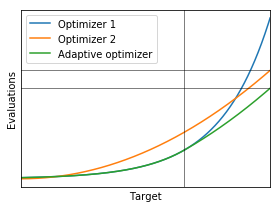

In [31]:
compound = np.concatenate((z[:where], (y[where:] - y[where])+z[where]))
doplot()
plt.plot(x, compound, label='Adaptive optimizer')
plt.axvline(x=x[where], color='black', linewidth=1, alpha=.5)
plt.axhline(y=y[-1], color='black', linewidth=1, alpha=.5)
plt.axhline(y=compound[-1], color='black', linewidth=1, alpha=.5)
plt.legend(loc=0)
plt.tight_layout()
plt.savefig('adaptive_example_3.pdf')
plt.show()

# Why using ERT or bootstrapped ART does not work

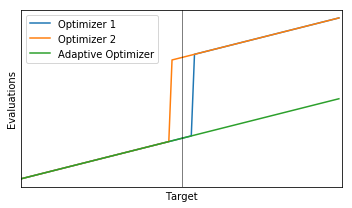

In [25]:
a = np.arange(100)
b = np.arange(100)

a[54:] += 100
b[47:] += 100
c = np.concatenate((a[:50], (b[50:] - b[50] + a[50])))

plt.figure(figsize=(5, 3))
plt.plot(a, label='Optimizer 1')
plt.plot(b, label='Optimizer 2')
plt.plot(c, label='Adaptive Optimizer')
plt.axvline(x=50, color='black', linewidth=1, alpha=.5)
plt.legend(loc=0)
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False
)
plt.xlim([0,100])
plt.xlabel('Target')
plt.ylabel('Evaluations')
plt.tight_layout()
plt.savefig('adaptive_beats_ERT.pdf')
plt.show()